In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("city_day.csv")


In [24]:
# Display the first few rows of the dataset
print(df.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [25]:
# Get information about the dataset, including column data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [26]:
# Summary statistics of numeric columns
print(df.describe())


              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

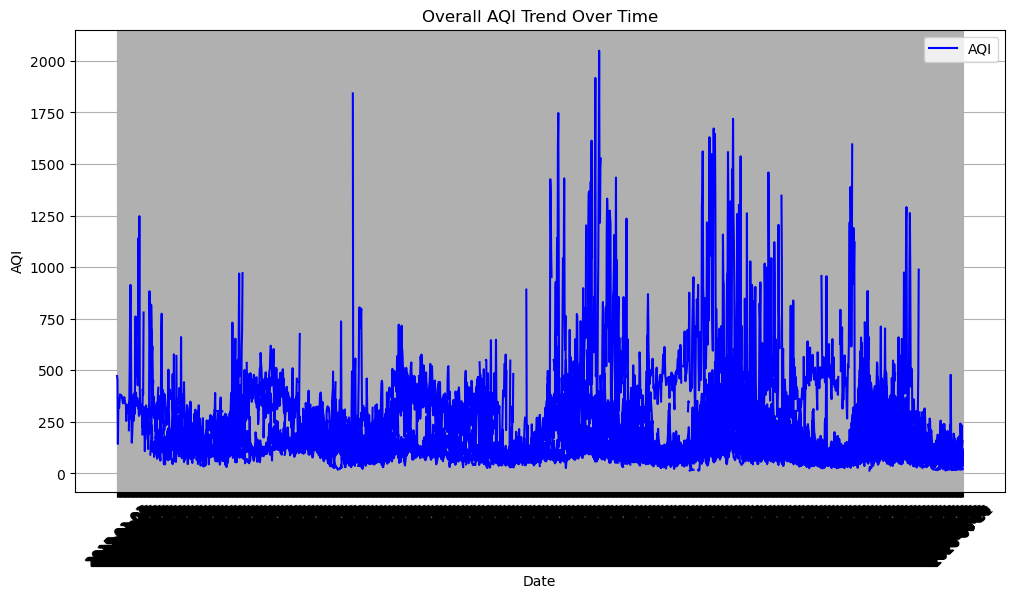

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AQI'], label='AQI', color='blue')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall AQI Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


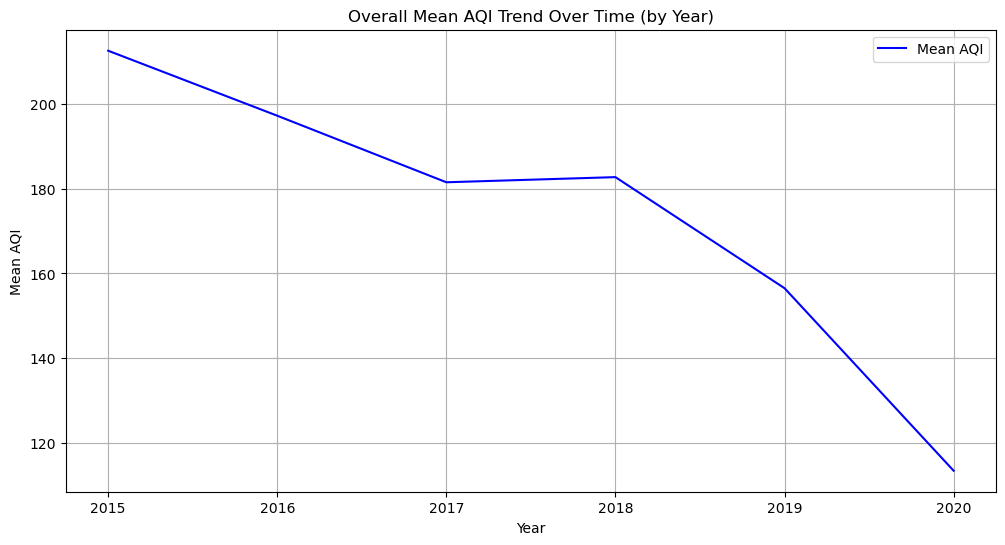

In [29]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and calculate the mean AQI for each year
yearly_mean_AQI = df.groupby('Year')['AQI'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_mean_AQI.index, yearly_mean_AQI.values, label='Mean AQI', color='blue')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.title('Overall Mean AQI Trend Over Time (by Year)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

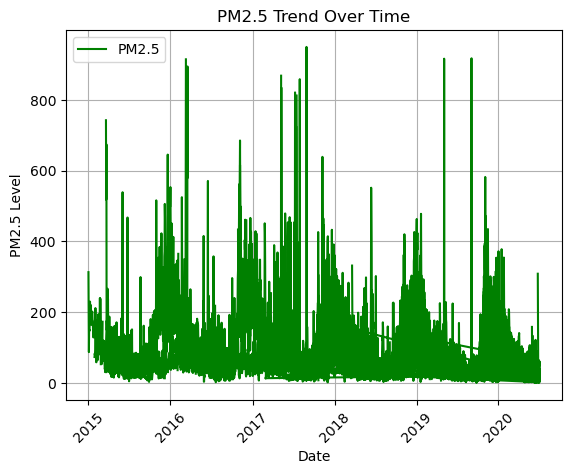

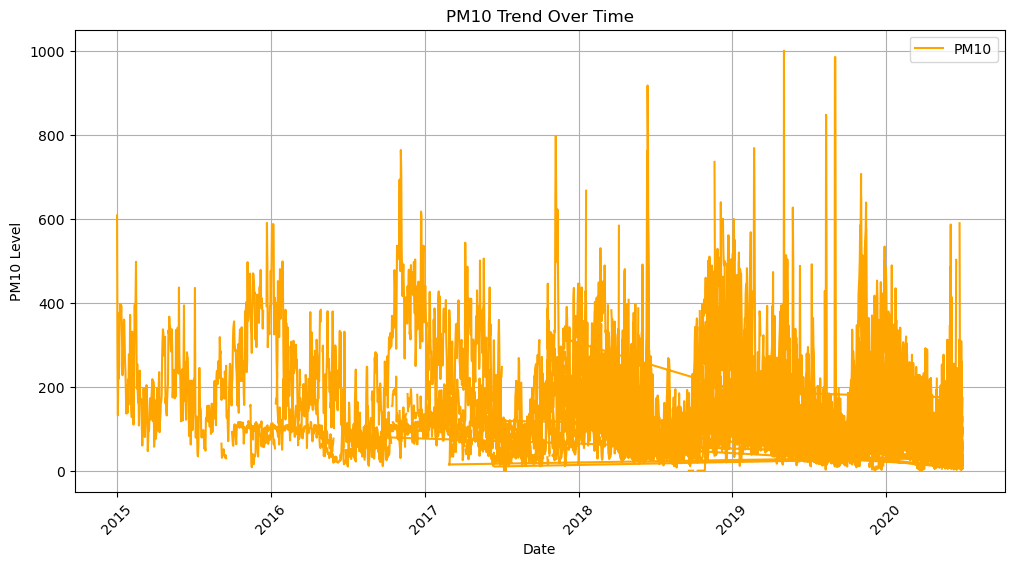

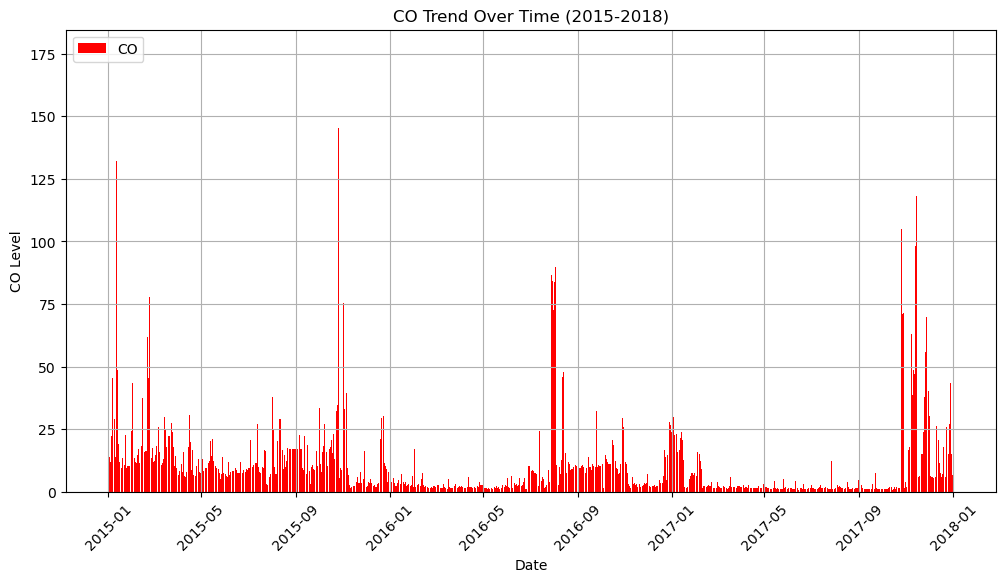

In [34]:
# PM2.5 trend
plt.plot(df['Date'], df['PM2.5'], label='PM2.5', color='green')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# PM10 trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PM10'], label='PM10', color='orange')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.title('PM10 Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# CO trend
# Filter the DataFrame for the date range from 2015 to 2018
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2018-01-01')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# 3. Plot CO levels as a bar graph for the specified date range
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Date'], filtered_df['CO'], color='red', label='CO')
plt.xlabel('Date')
plt.ylabel('CO Level')
plt.title('CO Trend Over Time (2015-2018)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()